We are going to base ourselves on the monthly sales data of a smartphones and gadgets company, find answers for following questions:

* Which month did we achieve the best turnover?
* In which city did we have the most orders?
* When should we make an advertising campaign to have more sales?
* Which product sold the most?
* What are the best selling product combinations?

In [215]:
# import of libaries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [216]:
path = os.listdir(os.getcwd())
for p in path:
    print(p)

.DS_Store
.ipynb_checkpoints
company_sales_analysis.ipynb
sales_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### import all data, and combine in one

In [217]:
file_names = ['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv', 'Sales_July_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv', 'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv']

data = pd.DataFrame()
for i in file_names:
    current_data = pd.read_csv(i)
    data = pd.concat([data, current_data])
    print(current_data.shape)

(9723, 6)
(12036, 6)
(15226, 6)
(18383, 6)
(16635, 6)
(13622, 6)
(14371, 6)
(12011, 6)
(11686, 6)
(20379, 6)
(17661, 6)
(25117, 6)


In [218]:
data.shape

(186850, 6)

In [13]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [219]:
data.to_csv('sales_2019.csv', index=False)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [221]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


* There are 355 samples which are meaningless, filled with column names 'Order ID	Product	Quantity Ordered	Price Each	Order Date	Purchase Address', so I'll drop all these.

In [222]:
data = data[data.Product!='Product']
data.shape

(186495, 6)

## Missing and duplicated data

In [223]:
data.isnull().mean()*100

Order ID            0.292233
Product             0.292233
Quantity Ordered    0.292233
Price Each          0.292233
Order Date          0.292233
Purchase Address    0.292233
dtype: float64

* Drop these 0.29% missing data

In [224]:
data.dropna(how='all', inplace=True)
data.shape

(185950, 6)

In [225]:
data.duplicated().sum()

264

In [235]:
data = data.drop_duplicates().reset_index(drop=True)
data.shape

(185686, 7)

In [43]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185686,185686,185686,185686,185686,185686
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


### Which month did we achieve the best turnover?

In [227]:
data['month'] = pd.to_datetime(data['Order Date'],format='%m/%d/%y %H:%M').dt.month

In [239]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)
data['Price Each'] = data['Price Each'].astype(float)

In [240]:
data['sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


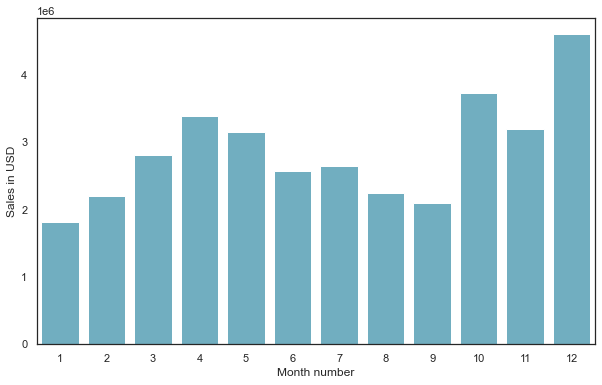

In [308]:
plt.figure(figsize=(10, 6))
sns.barplot(y=data.groupby('month')['sales'].sum().values, x=data.groupby('month')['sales'].sum().index, color='c')
plt.ylabel('Sales in USD')
plt.xlabel('Month number');

### In which city did we have the most orders?

In [270]:
data['city'] = data['Purchase Address'].str.split(',',expand=True)[1]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [271]:
data.city.value_counts()

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: city, dtype: int64

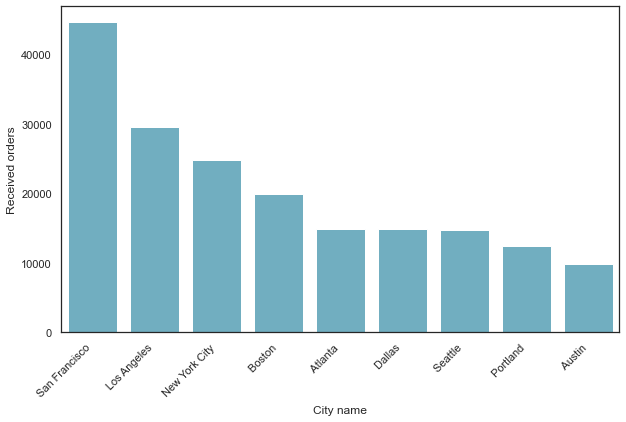

In [307]:
plt.figure(figsize=(10, 6))
sns.countplot(data.city, order=data.city.value_counts().index, color='c')
plt.ylabel('Received orders')
plt.xlabel('City name')
plt.xticks(rotation=45, ha='right');

### When should we make an advertising campaign to have more sales?

In [277]:
data['hour'] = pd.to_datetime(data['Order Date'],format='%m/%d/%y %H:%M').dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


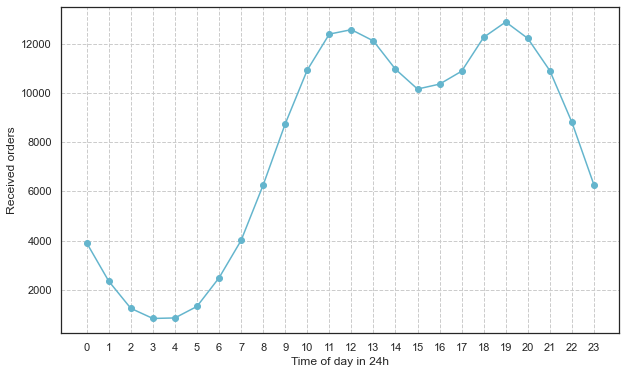

In [409]:
plt.figure(figsize=(10, 6))
data.groupby('hour')['hour'].count().plot(marker='o', color='c')
plt.xticks(range(24))
plt.ylabel('Received orders')
plt.xlabel('Time of day in 24h')
plt.grid(ls='--');

### Which product sold the most?

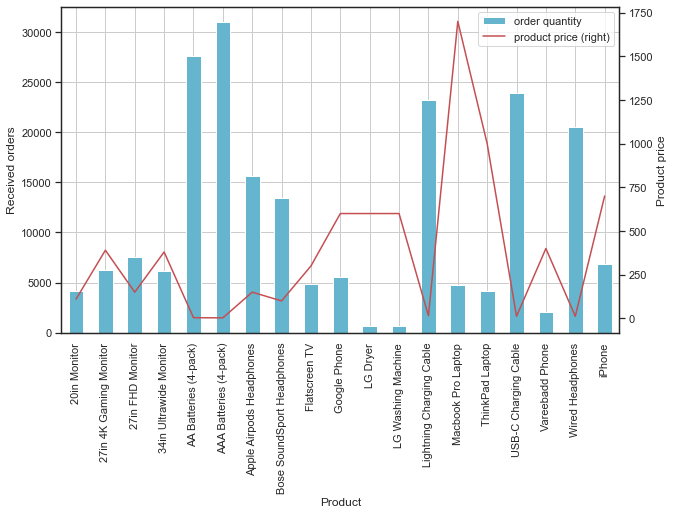

In [410]:
plt.figure(figsize=(10,6))
data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar', color='c', rot=90, label='order quantity', legend=True)
plt.ylabel('Received orders')
data.groupby('Product')['Price Each'].mean().plot(secondary_y=True,color='r', rot=90, label='product price', legend=True, grid=True)
plt.ylabel('Product price');

### What are the best selling product combinations?
Duplicated order id contains product combination

In [420]:
comb_data = data[data['Order ID'].duplicated(keep=False)]
comb_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11


In [438]:
comb_data['comb_products'] = comb_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
comb_data.drop_duplicates(subset=['Order ID'], inplace=True)
comb_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,comb_products
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,"Vareebadd Phone,Wired Headphones"
153,141384,Google Phone,1,600.00,01/03/19 00:14,"223 Jackson St, Boston, MA 02215",1,600.00,Boston,0,"Google Phone,USB-C Charging Cable"
220,141450,Google Phone,1,600.00,01/12/19 11:16,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco,11,"Google Phone,Bose SoundSport Headphones"


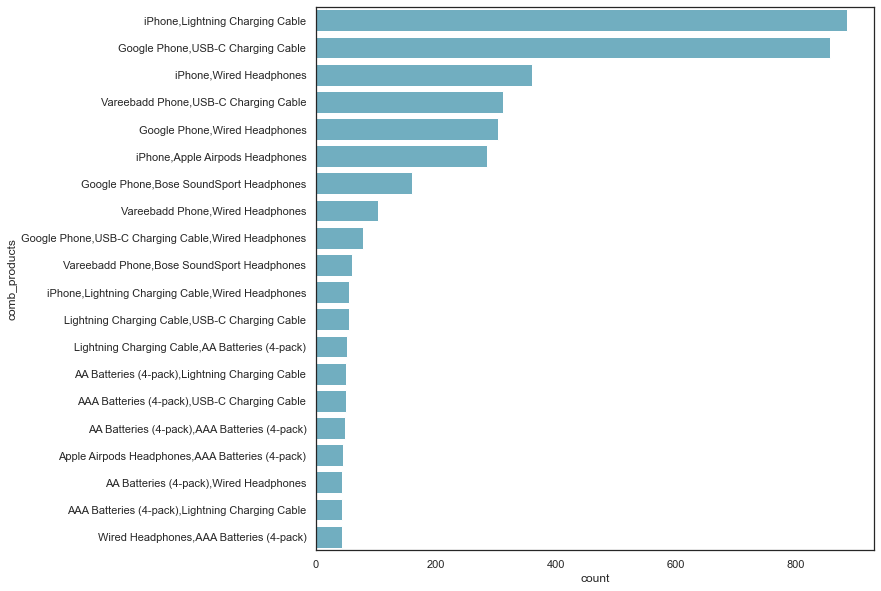

In [440]:
plt.figure(figsize=(10, 10))
sns.countplot(y=comb_data.comb_products, order=comb_data.comb_products.value_counts().head(20).index, color='c');

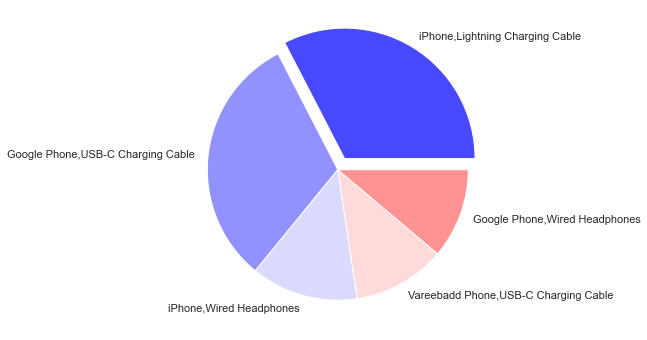

In [452]:
comb_data.comb_products.value_counts()[:5].plot.pie(colors=sns.color_palette('bwr'), explode=[0.1,0,0,0,0], figsize=(10, 6))
plt.ylabel('');